In [1]:
import storypy as sp
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

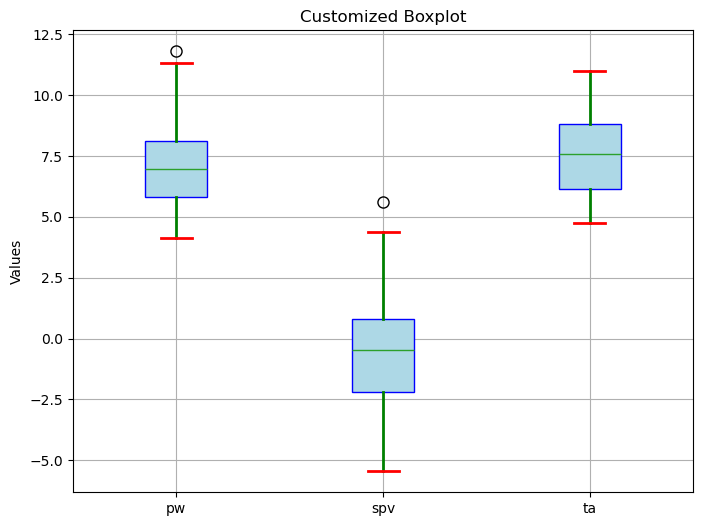

In [4]:
from storypy.data import read_drivers
# Plot boxplot of Global Warming, Tropical Warming, Polar Warming and Stratospheric Polar Vortex

rds = read_drivers()
models = rds.index.tolist()
# Enhanced boxplot with customizations
plt.figure(figsize=(8, 6))
rds.boxplot(patch_artist=True, 
           boxprops=dict(facecolor='lightblue', color='blue'),
           whiskerprops=dict(color='green', linewidth=2),
           capprops=dict(color='red', linewidth=2),
           flierprops=dict(marker='o', color='black', markersize=8))

plt.title('Customized Boxplot')
plt.ylabel('Values')
plt.show()

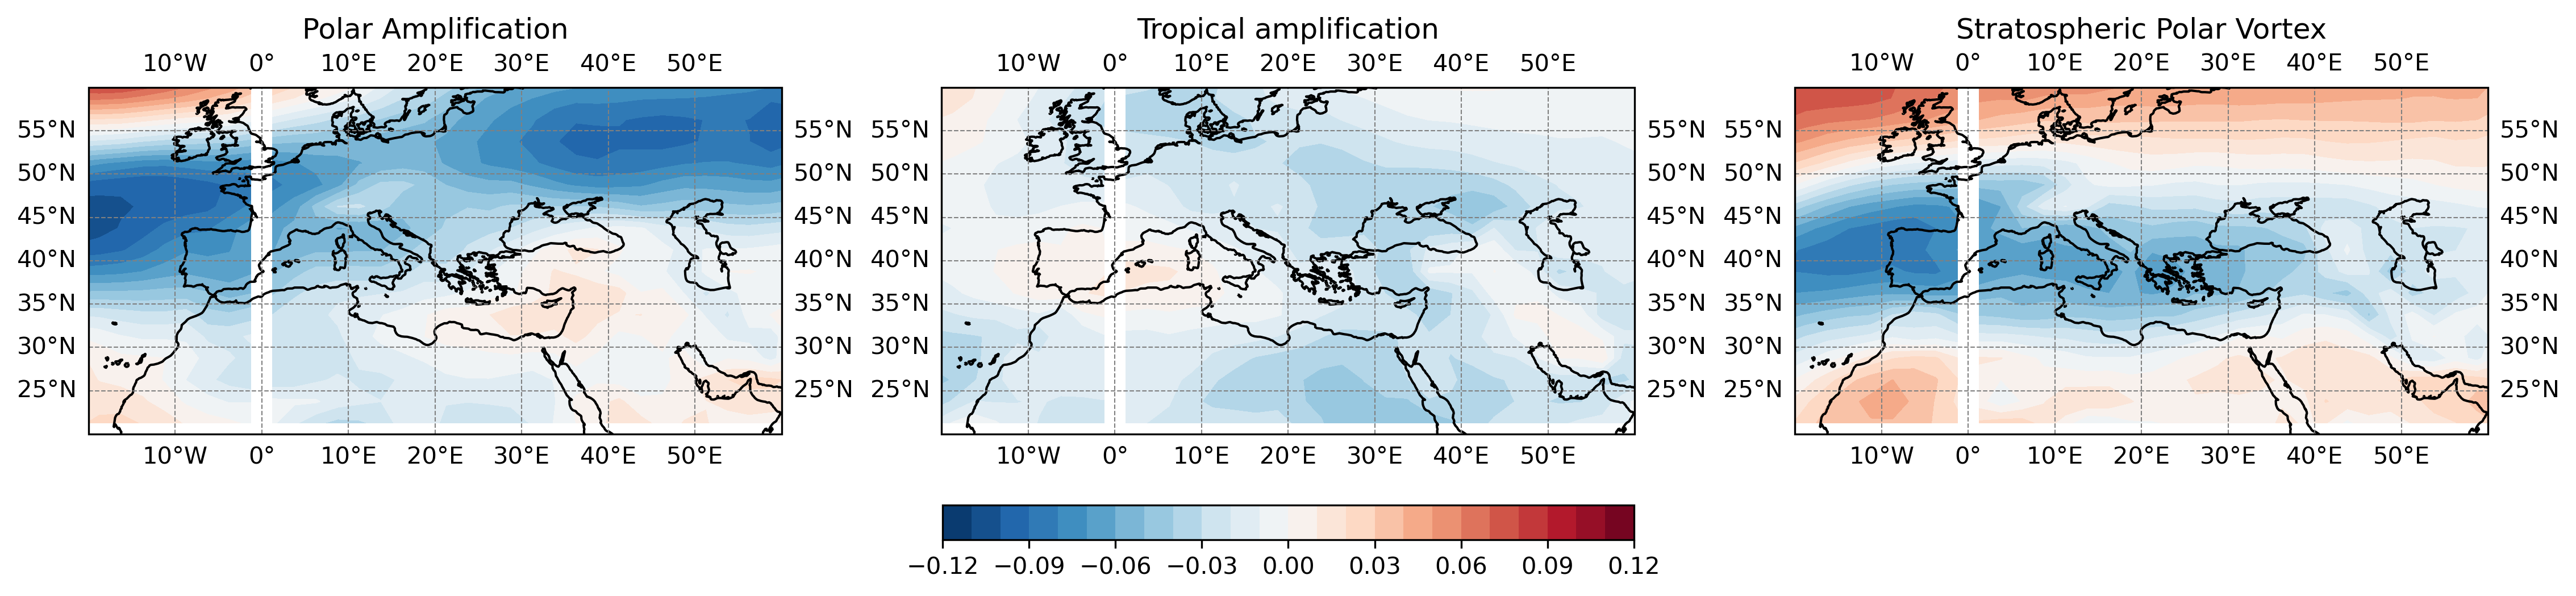

In [3]:
from storypy.data import read_ua_regression_coefficients

data = read_ua_regression_coefficients().sel(lat=slice(-88,88)) 
coefficients = [ data.pw, data.ta, data.spv ]
levels = [np.arange(-.12,.13,.01)] * 3
extent = [[-20,60,20,60]] * 3
cmaps = ['RdBu_r'] * 3
titles = ['Polar Amplification','Tropical amplification','Stratospheric Polar Vortex']
fig = sp.create_three_panel_figure(coefficients, extent, levels, cmaps, titles)

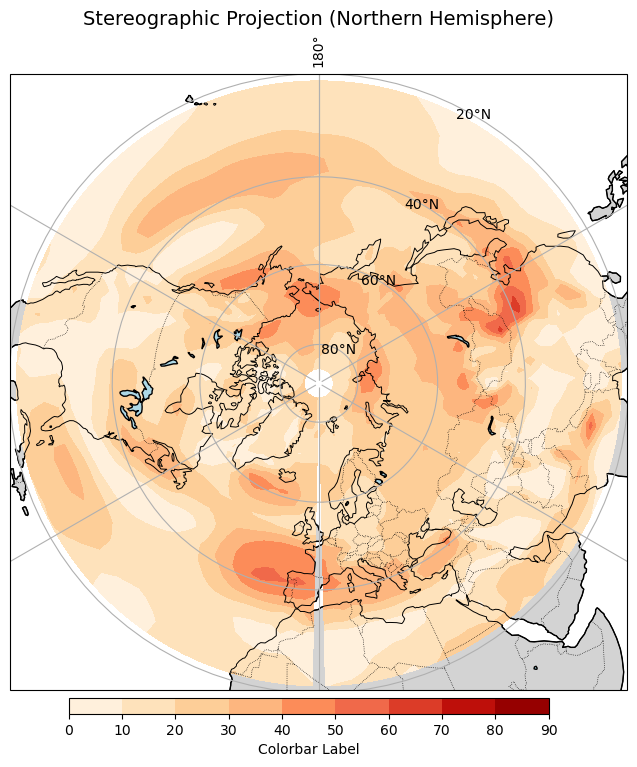

In [6]:
from storypy.data import read_ua_R2


# Usage:
data = read_ua_R2().sel(lat=slice(-88,88)).ua * 100
levels = np.arange(0, 100, 10)
extent=[-180, 180, 20, 90]
sp.hemispheric_plot(data, levels, extent, cmap="OrRd", title="Stereographic Projection (Northern Hemisphere)")

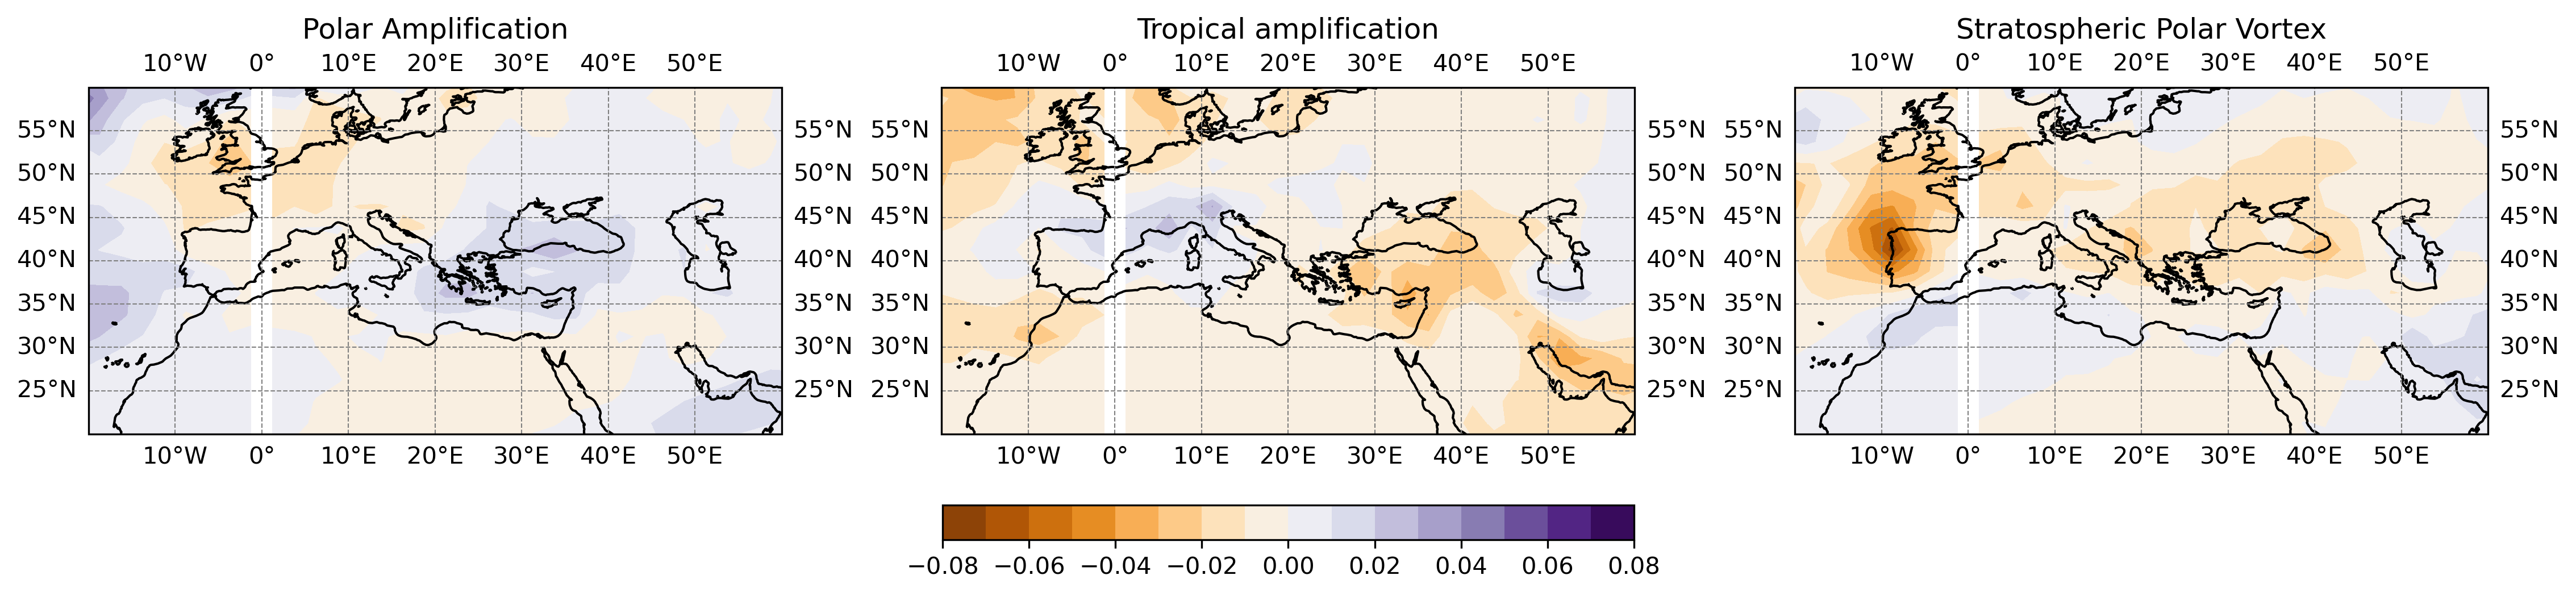

In [7]:
from storypy.data import read_pr_regression_coefficients

data = read_pr_regression_coefficients().sel(lat=slice(-88,88)) * 86400
sc = 1.26
coefficients = [ data.pw, data.ta, data.spv ]
levels = [np.arange(-.08,.09,.01)] * 3
extent = [[-20,60,20,60]] * 3
cmaps = ['PuOr'] * 3
titles = ['Polar Amplification','Tropical amplification','Stratospheric Polar Vortex']
fig = sp.create_three_panel_figure(coefficients, extent, levels, cmaps, titles)

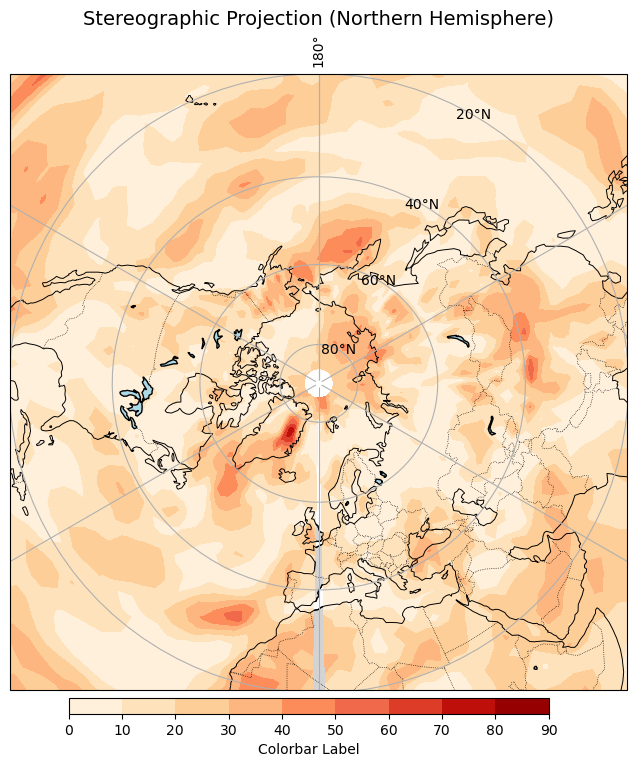

In [5]:
from storypy.data import read_pr_R2


# Usage:
data = read_pr_R2().sel(lat=slice(-88,88)).pr * 100
levels = np.arange(0, 100, 10)
extent=[-180, 180, 20, 90]
sp.hemispheric_plot(data, levels, extent, cmap="OrRd", title="Stereographic Projection (Northern Hemisphere)")

['ACCESS-CM2', 'ACCESS-ESM1-5', 'BCC-CSM2-MR', 'CAMS-CSM1-0', 'CAS-ESM2-0', 'CESM2-WACCM', 'CESM2', 'CIESM', 'CMCC-CM2-SR5', 'CMCC-ESM2', 'CNRM-CM6-1', 'CNRM-ESM2-1', 'CanESM5', 'E3SM-1-0', 'EC-Earth3', 'FGOALS-g3', 'GISS-E2-1-G', 'GISS-E2-1-H', 'HadGEM3-GC31-LL', 'HadGEM3-GC31-MM', 'IITM-ESM', 'INM-CM4-8', 'INM-CM5-0', 'IPSL-CM6A-LR', 'KACE-1-0-G', 'MCM-UA-1-0', 'MIROC-ES2L', 'MIROC6', 'MPI-ESM1-2-HR', 'MPI-ESM1-2-LR', 'MRI-ESM2-0', 'NESM3', 'NorESM2-LM', 'NorESM2-MM', 'TaiESM1', 'UKESM1-0-LL']
90.0
90.0
90.0


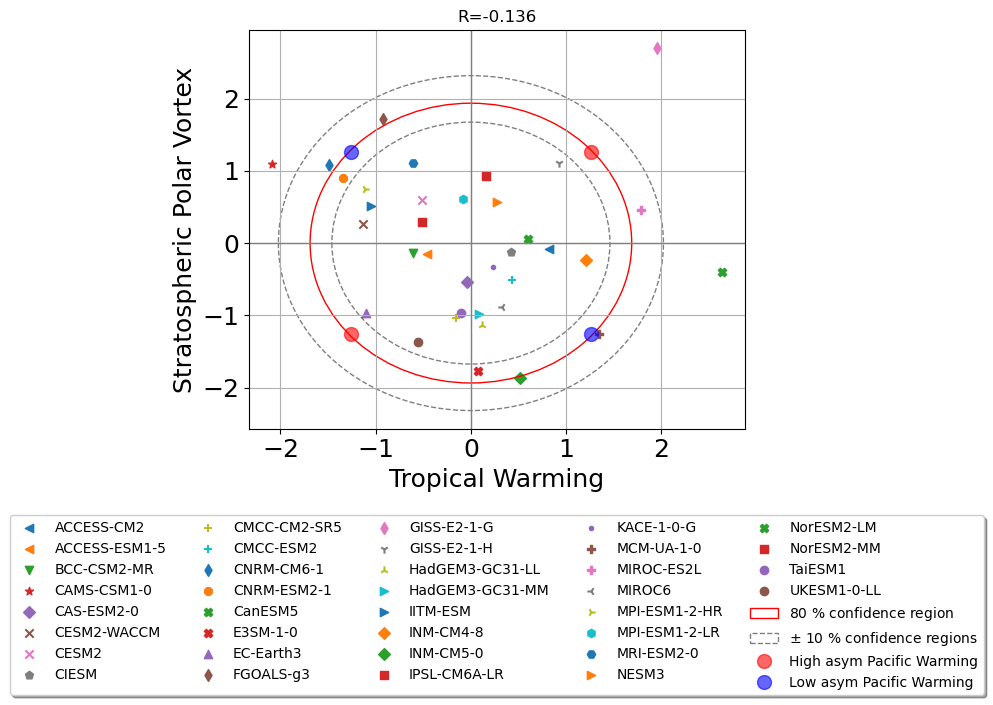

In [2]:
from storypy.data import read_scaled_standardized_drivers
import pandas as pd

rds = read_scaled_standardized_drivers()
models = rds.index.tolist()
fig = sp.plot_ellipse(models,rds["spv"].values,rds["ta"].values,corr="no",x_label="Tropical Warming",y_label="Stratospheric Polar Vortex")

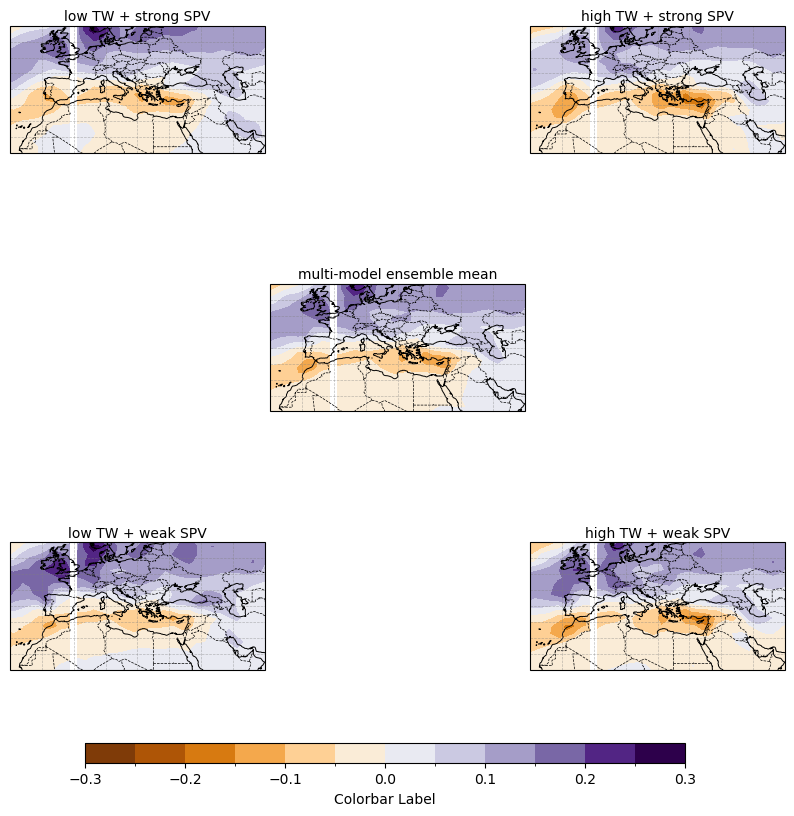

In [3]:
from storypy.data import read_pr_regression_coefficients
import numpy as np

### Plot coefficients from multiple linear regression for precipitation
data = read_pr_regression_coefficients().sel(lat=slice(-88,88)) * 86400
sc = 1.26
storylines = [data.MEM + sc*data.spv - sc*data.ta, data.MEM + sc*data.spv + sc*data.ta, data.MEM - sc*data.spv - sc*data.ta,data.MEM - sc*data.spv + sc*data.ta ,  data.MEM]
levels = [np.arange(-.3,.35,.05)] * 5
extent = [[-20,60,20,60]] * 5
cmaps = ['PuOr'] * 5
titles = ['low TW + strong SPV','high TW + strong SPV','low TW + weak SPV','high TW + weak SPV','multi-model ensemble mean']
fig = sp.create_five_panel_figure(storylines, extent, levels, cmaps, titles, white_range=(-0.1, 0.1))

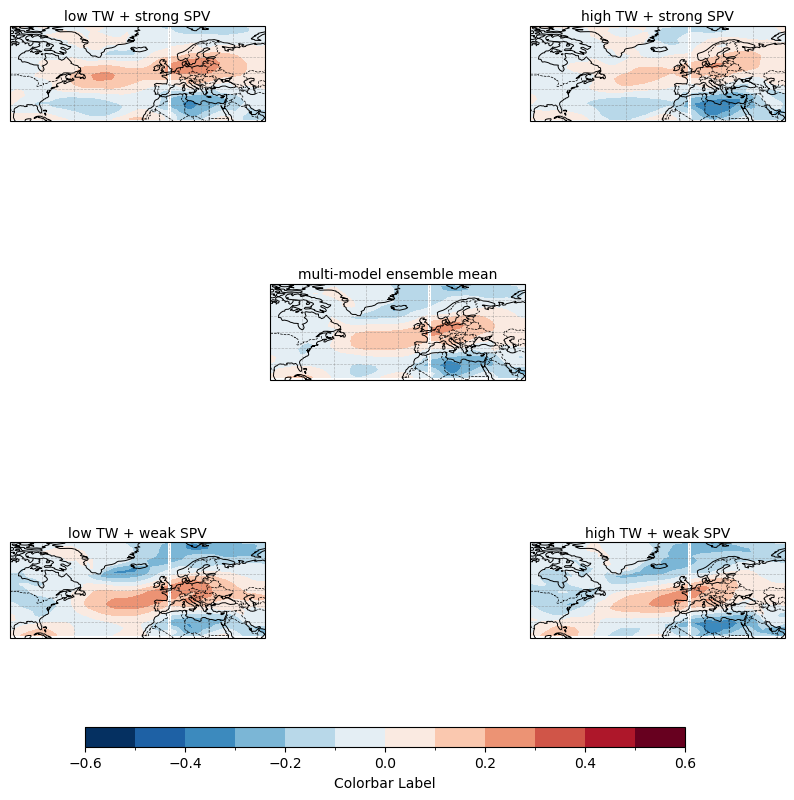

In [4]:
from storypy.data import read_ua_regression_coefficients
import numpy as np

### Plot coefficients from multiple linear regression for wind
data = read_ua_regression_coefficients().sel(lat=slice(-88,88))
sc = 1.26
storylines = [data.MEM + sc*data.spv - sc*data.ta, data.MEM + sc*data.spv + sc*data.ta, data.MEM - sc*data.spv - sc*data.ta,data.MEM - sc*data.spv + sc*data.ta ,  data.MEM]
levels = [np.arange(-.6,.7,.1)] * 5
extent = [[-100,60,20,80]] * 5
cmaps = ['RdBu_r'] * 5
titles = ['low TW + strong SPV','high TW + strong SPV','low TW + weak SPV','high TW + weak SPV','multi-model ensemble mean']
fig = sp.create_five_panel_figure(storylines, extent, levels, cmaps, titles, white_range=(-0.1, 0.1))
# Save figures
#path_plots = '/climca/people/jmindlin/esmvaltool_output/zappa_shepherd_CMIP6_20241204_165252/plots/multiple_regression_indices/multiple_regresion/regression_output'